In [1]:
import pandas as pd #importing pandas and numpy packages 
import numpy as np

In [2]:
#importing the dataset where data with respect to date starting from 22nd January - April 2nd 2020 is mentioned
df= pd.read_csv("covid_19_data1.csv")

In [3]:
#displays the first 5 data present in the dataset
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [6]:
#Since we are concerned with the country here only, hence let us remove the column fro Province/State


In [4]:
df.drop('Province/State',axis=1,inplace=True)

In [5]:
#set the index as Sno
df.set_index("SNo",inplace=True)

In [7]:
df.shape
df.rename(columns={'Country/Region':'Country'}, inplace=True) #renaming the column from Country/Region to Country
df.sample(10) #lets view our data 


,ObservationDate,Country,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,
3683,03/06/2020,US,2020-03-05T20:33:03,3.0,0.0,1.0
8303,03/24/2020,Madagascar,2020-03-24 23:41:50,17.0,0.0,0.0
8663,03/25/2020,Thailand,2020-03-25 23:37:49,934.0,4.0,70.0
5442,03/14/2020,Mainland China,2020-03-14T00:13:05,125.0,1.0,113.0
10751,04/01/2020,Israel,2020-04-01 22:04:58,6092.0,26.0,241.0
2374,02/25/2020,US,2020-02-13T18:53:02,1.0,0.0,0.0
4154,03/08/2020,US,2020-03-08T21:33:02,2.0,0.0,0.0
3728,03/06/2020,Serbia,2020-03-06T15:43:02,1.0,0.0,0.0
4741,03/11/2020,Netherlands,2020-03-11T14:13:11,503.0,5.0,0.0


In [8]:
import datetime
df['ObservationDate']=pd.to_datetime(df['ObservationDate'])
#converting ObservationDate to dateTime

In [9]:
df.drop(['Last Update'],axis=1,inplace=True)

In [10]:
df.head()

,ObservationDate,Country,Confirmed,Deaths,Recovered
SNo,,,,,
1,2020-01-22,Mainland China,1.0,0.0,0.0
2,2020-01-22,Mainland China,14.0,0.0,0.0
3,2020-01-22,Mainland China,6.0,0.0,0.0
4,2020-01-22,Mainland China,1.0,0.0,0.0
5,2020-01-22,Mainland China,0.0,0.0,0.0


In [11]:
deaths_df=df.groupby("ObservationDate")['Deaths'].sum()
#This will let us know the Deaths that occured each day in the world

In [20]:
deaths_df.sample(10)
#The below data is the number of deaths each day during COVID-19 Pandemic

ObservationDate
2020-03-07     3558.0
2020-03-19     9867.0
2020-02-02      362.0
2020-02-19     2122.0
2020-02-10     1013.0
2020-04-01    46809.0
2020-03-21    12973.0
2020-03-28    30652.0
2020-03-11     4615.0
2020-03-15     6440.0
Name: Deaths, dtype: float64

/home/lokesh/anaconda3/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


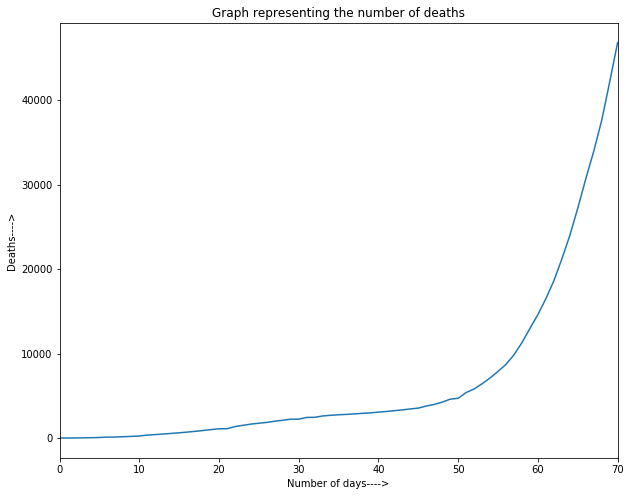

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.tsplot(data=deaths_df)
plt.xlabel("Number of days---->")
plt.ylabel("Deaths---->")
plt.title("Graph representing the number of deaths")
plt.show()


In [22]:
#The above graph represents the number of deaths vs. the number of days. (X-axis-> Number of days from 22nd January to 2nd April 2020)
#The rise of death count with each day is clearly significant here.

In [15]:
df['month']=df['ObservationDate'].dt.month
df['month'].sample(10)
#we now will use only the months to check the number of Deaths, Recovery and Confirmed Data

SNo
998     2
8783    3
1662    2
6486    3
9911    3
7675    3
2393    2
4671    3
4579    3
414     1
Name: month, dtype: int64

# Each month dates
#Month-1 -> 22nd January-31st January 2020
#Month-2 -> 1st February-29th February 2020
#Month-3 ->1st March-31st March 2020
#Month-4 ->1st April-2nd April 2020


In [27]:
deaths_month=df.groupby("month")['Deaths'].mean()
deaths_month
#this represents the mean/average of the number of deaths each month


month
1      1.803245
2     20.171183
3     49.175220
4    149.549521
Name: Deaths, dtype: float64

In [28]:
deaths_month_sum=df.groupby("month")['Deaths'].sum()
deaths_month_sum
#total deaths during each month 

month
1       889.0
2     46898.0
3    386173.0
4     46809.0
Name: Deaths, dtype: float64

In [29]:
Recovered_month_mean=df.groupby("month")['Recovered'].mean()
Recovered_month_mean
#total recovered mean cases during each month

month
1      1.711968
2    163.782366
3    344.799058
4    617.178914
Name: Recovered, dtype: float64

In [30]:
Confirmed_month_mean=df.groupby("month")['Confirmed'].mean()
Confirmed_month_mean
#total mean confirmed cases during each month

month
1      78.164300
2     719.122151
3    1132.634280
4    2979.568690
Name: Confirmed, dtype: float64

# This data cleary shows the rise of COVID-19 cases all over the world.